# TASK 2 - IRIS FLOWER CLASSIFICATION:

* The Iris flower dataset consists of three species: setosa, versicolor and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers intotheir respective species.

* Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

* Dataset from kaggle - https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [85]:
## Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [86]:
## Reading the csv file using pandas Dataframe:

df = pd.read_csv("IRIS.csv")
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
## Checking any Null values:

display(df.isnull().sum())      # No null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [88]:
## Finding shape of Dataframe:

display(df.shape)

(150, 5)

In [89]:
## Finding description of the data in the DataFrame:

display(df.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
## Checking datatypes of each column:

display(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [91]:
## Counts of each species:

display(df.species.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Performing EDA from above Dataframe:

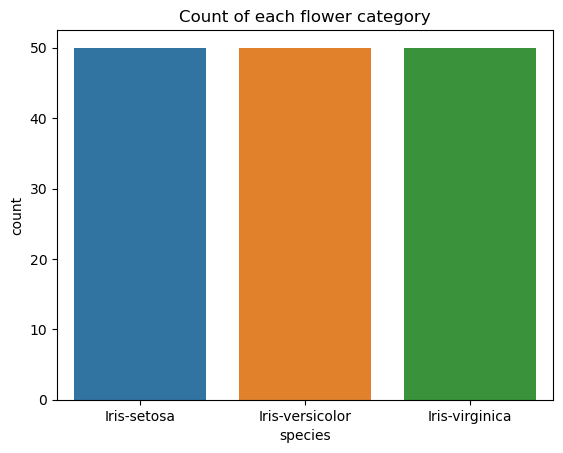

In [92]:
## Count of each flower category using countplot:

sns.countplot(df, x = df["species"])
plt.title("Count of each flower category")
plt.show()

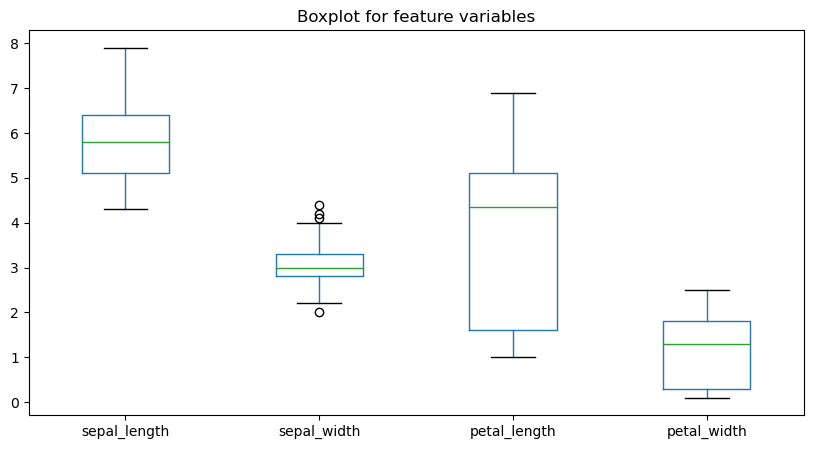

In [93]:
## Displaying minimum, first quartile, median, third quartile and maximum of feature variable using boxplot:

df.boxplot(figsize=(10,5),grid=False)
plt.title("Boxplot for feature variables")
plt.show()

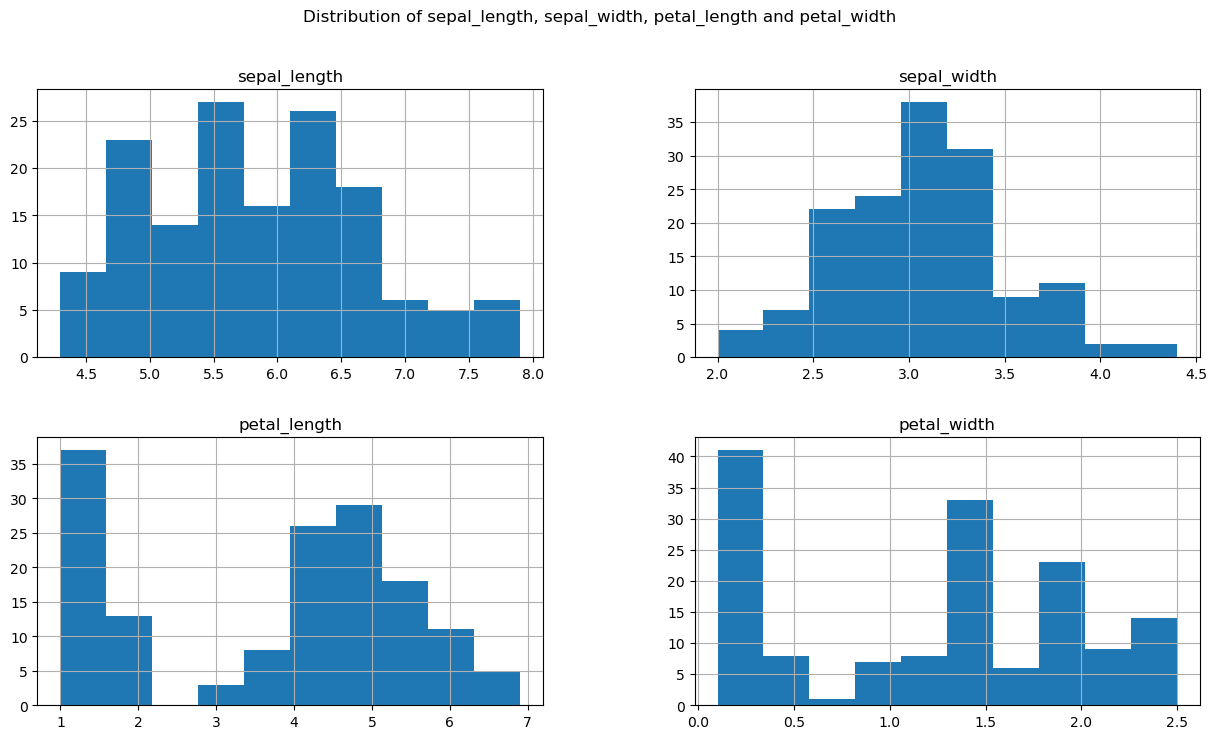

In [94]:
## Distribution of sepal_length, sepal_width, petal_length and petal_width:

df.hist(figsize=(15,8))
plt.suptitle("Distribution of sepal_length, sepal_width, petal_length and petal_width")
plt.show()

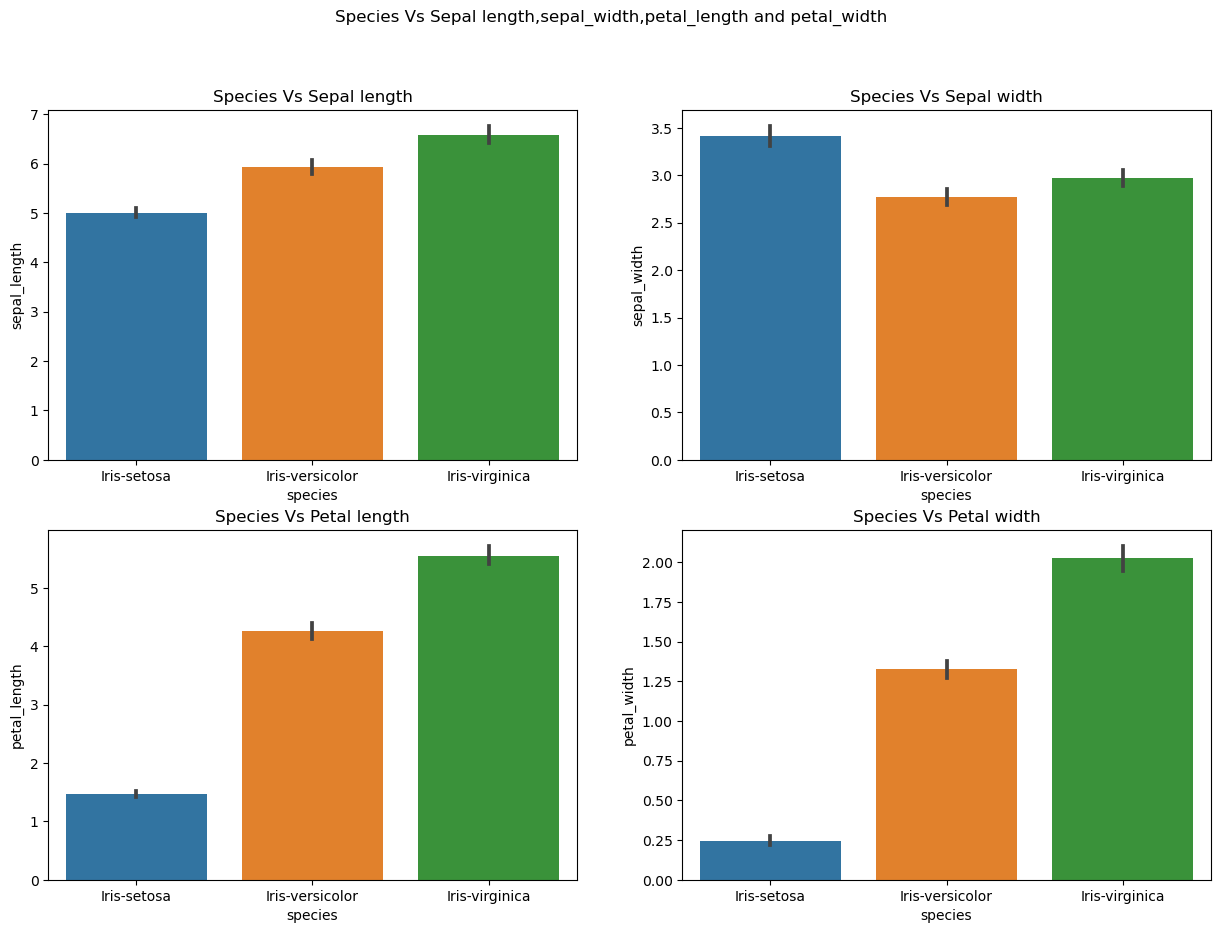

In [95]:
## Creating barplot of Species Vs Sepal length,sepal_width,petal_length and petal_width respectively:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Species Vs Sepal length,sepal_width,petal_length and petal_width')

#creating barplot in each subplot

sns.barplot(df, x='species',y='sepal_length', ax=axes[0,0])
axes[0,0].set_title("Species Vs Sepal length")
sns.barplot(df, x='species',y='sepal_width', ax=axes[0,1])
axes[0,1].set_title("Species Vs Sepal width")
sns.barplot(df, x='species',y='petal_length', ax=axes[1,0])
axes[1,0].set_title("Species Vs Petal length")
sns.barplot(df, x='species',y='petal_width', ax=axes[1,1])
axes[1,1].set_title("Species Vs Petal width")
plt.show()

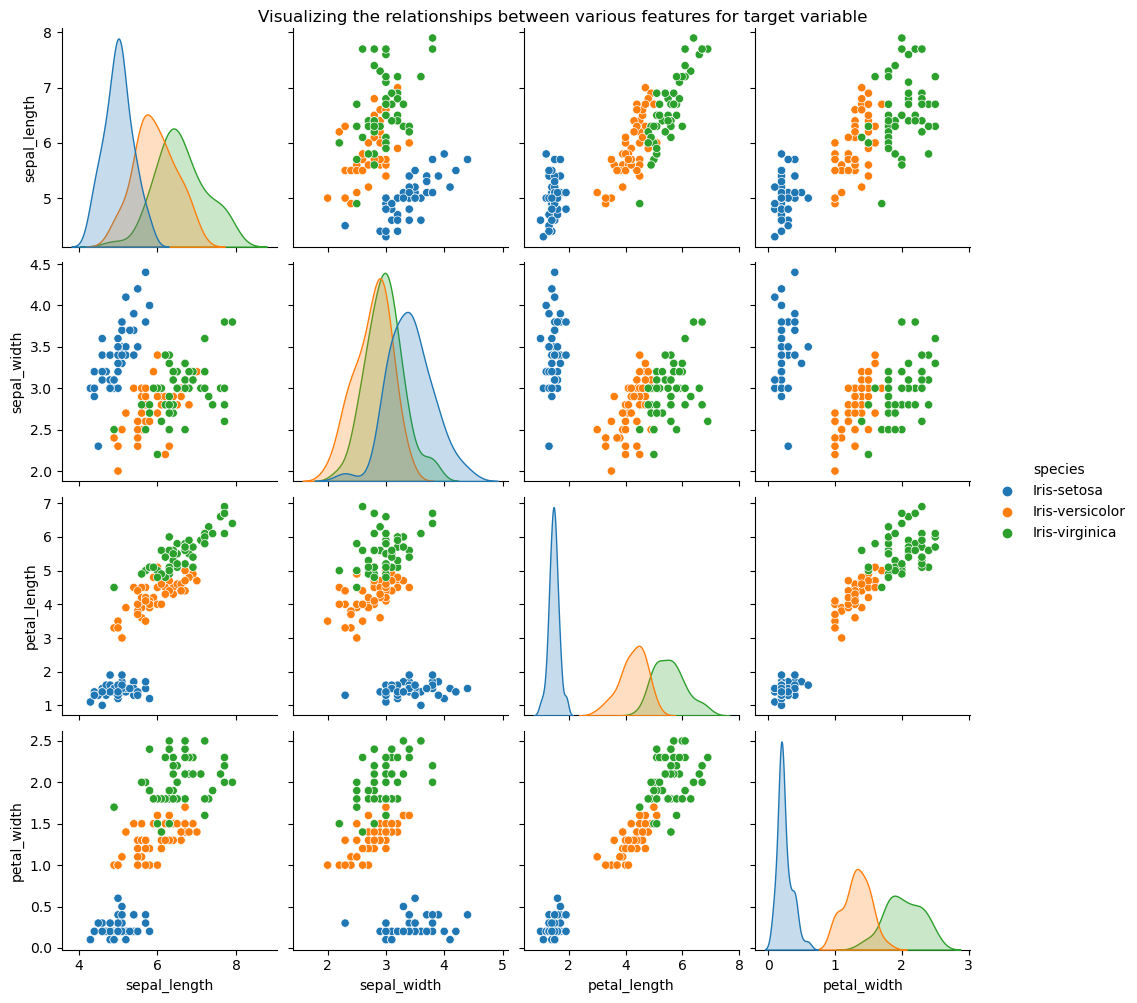

In [96]:
## Visualizing the relationships between various features and the Iris flower species:

sns.pairplot(df, hue="species")
plt.suptitle("Visualizing the relationships between various features for target variable",y=1)
plt.show()

# Extract independent and dependent variables into the x and y DataFrames:

In [97]:
## creating independent variables:

print("Independent variables(x) are:")
x = df.drop("species", axis = 1)
display(x)

## creating dependent variable:

print("Dependent variables(y) is:")
y = df.species
display(y)

Independent variables(x) are:


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Dependent variables(y) is:


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

# Spliting data into train and test by 20% as test size:

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("Spliting data into train and test, by 20% as test size:")
print("Shape of the x_train:", x_train.shape)
print("Shape of the x_test:",  x_test.shape)
print("Shape of the y_train:", y_train.shape)
print("Shape of the y_test:",  y_test.shape)

Spliting data into train and test, by 20% as test size:
Shape of the x_train: (120, 4)
Shape of the x_test: (30, 4)
Shape of the y_train: (120,)
Shape of the y_test: (30,)


# Building the model and finding their accuracy:

In [99]:
## Train the model:

model = KNeighborsClassifier()
model.fit(x_train, y_train)

## prediction:

predictions = model.predict(x_test)
#predictions

## Finding Accuracy:

accuracy = accuracy_score(y_test,predictions)

print("The accuracy of the model is:")
accuracy

The accuracy of the model is:


1.0

# Testing Sample data:

In [100]:
## Sample dataset1:

data = {"sepal_length":5,"sepal_width":3.3,"petal_length":1.4,"petal_width":0.2}

test_df1=pd.DataFrame(data,index=[0])
print("Sample dataset1 for testing:")
display(test_df1)

predict_test_df1=model.predict(test_df1)
print("Output for sample dataset1 is:")
display(predict_test_df1)

Sample dataset1 for testing:


,sepal_length,sepal_width,petal_length,petal_width
0,5,3.3,1.4,0.2


Output for sample dataset1 is:


array(['Iris-setosa'], dtype=object)

In [101]:
## Sample dataset2:

data = {"sepal_length":5.7,"sepal_width":2.8,"petal_length":4.1,"petal_width":1.3}

test_df2=pd.DataFrame(data,index=[0])
#display(test_df2)

predict_test_df2=model.predict(test_df2)
predict_test_df2

array(['Iris-versicolor'], dtype=object)

In [102]:
## Sample dataset3:

data = {"sepal_length":5.9,"sepal_width":3,"petal_length":5.1,"petal_width":1.8}

test_df3=pd.DataFrame(data,index=[0])
#display(test_df3)

predict_test_df3=model.predict(test_df3)
predict_test_df3

array(['Iris-virginica'], dtype=object)